# Area Between Curves and Application to Equality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from scipy.integrate import quad

$$f(x) = \sqrt(x) \quad g(x) = x^2$$

In [2]:
#define the functions and domain


In [3]:
#examine a plot


In [4]:
#find the area between


In [5]:
#area function


In [6]:
#determine the area


## Many Regions

An example from the 2015 AP CALCULUS AB exam follows:

-----
Let $f$ and $g$ be the functions defined by $f(x) = 1 + x + e^{x^2 - 2x}$ and $g(x) = x^4 - 6.5x^2 + 6x + 2$.  Let $R$ and $S$ be the two regions enclosed by the graphs of $f$ and $g$ shown in the figure below.

a. Find the sum of the areas of regions $R$ and $S$.

----

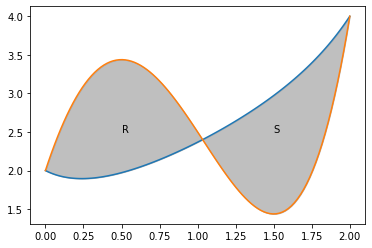

In [7]:
#define the functions
def f(x): return 1 + x + np.e**(x**2 - 2*x)
def g(x): return x**4 - 6.5*x**2 + 6*x + 2
#define domain
x = np.linspace(0, 2, 100)
#plot the regions, fill, add labels
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.fill_between(x, f(x), g(x), color = 'gray', alpha = 0.5)
plt.text(0.5, 2.5, 'R')
plt.text(1.5, 2.5, 'S');

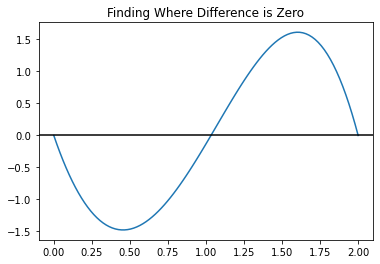

In [8]:
#plot the difference
plt.plot(x, f(x) - g(x))
plt.axhline(color = 'black')
plt.title('Finding Where Difference is Zero');

In [9]:
from scipy.optimize import root_scalar

In [10]:
def difference(x): return f(x) -  g(x)

In [11]:
root_scalar(difference, bracket = [.75, 1.25], method = 'bisect')

      converged: True
           flag: 'converged'
 function_calls: 40
     iterations: 38
           root: 1.032831888363944

In [12]:
roots = root_scalar(difference, bracket = [.75, 1.25], method = 'bisect')

In [13]:
roots.root

1.032831888363944

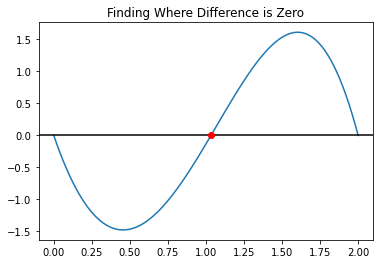

In [14]:
plt.plot(x, f(x) - g(x))
plt.axhline(color = 'black')
plt.title('Finding Where Difference is Zero');
plt.plot(roots.root, difference(roots.root), 'ro');

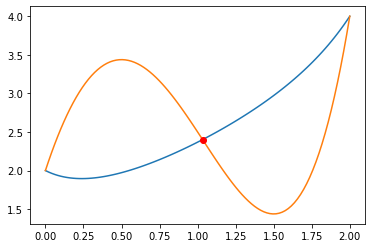

In [15]:
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.plot(roots.root, f(roots.root), 'ro')

In [16]:
def R(x): return g(x) - f(x)
def S(x): return f(x) - g(x)

In [17]:
area_R = quad(R, 0, roots.root)[0]

In [18]:
area_S = quad(S, roots.root, 2)[0]

In [19]:
area_R + area_S

2.0043456631323346

# Wealth Distribution and Baseball



![](images/baseballs.png)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [21]:
#urls
url = 'https://www.usatoday.com/sports/mlb/salaries/'

In [22]:
#
df = pd.read_html(url)[0]#gives me the first table from the page
df.head()

,rank,Name,Team,POS,Salary,Years,Total Value,Avg Annual
0,--,Max Scherzer,WSH,SP,"$42,142,857",7 (2015-21),"$210,000,000","$30,000,000"
1,--,Stephen Strasburg,WSH,SP,"$36,428,571",7 (2017-23),"$175,000,000","$25,000,000"
2,--,Mike Trout,LAA,CF,"$34,083,333",6 (2015-20),"$144,500,000","$24,083,333"
3,--,Zack Greinke,ARI,SP,"$32,421,884",6 (2016-21),"$206,500,000","$34,416,667"
4,--,David Price,BOS,SP,"$31,000,000",7 (2016-22),"$217,000,000","$31,000,000"


In [23]:
df['Salary'] = df['Salary'].str.replace('$','').str.replace(',','').astype(float)

<AxesSubplot:>

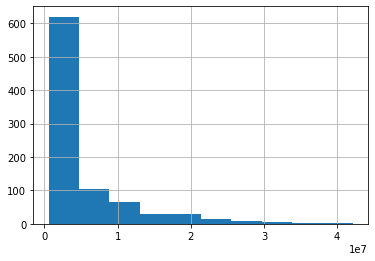

In [24]:
df['Salary'].hist()

## Looking at Percentiles

As we saw in class, here we want to look at different distributions according to quartiles or chunks of roughly 20% of the data in order.  To do so we will sort our salaries and break them into 5 roughly even sized groups. 

In [25]:
#sort the data
df['Salary'].sort_values()

876      555000.0
852      555000.0
851      555000.0
850      555000.0
849      555000.0
          ...    
4      31000000.0
3      32421884.0
2      34083333.0
1      36428571.0
0      42142857.0
Name: Salary, Length: 877, dtype: float64

In [26]:
sorted_salaries = df['Salary'].sort_values()

In [27]:
877/5

175.4

In [28]:
#build the groups
first_quartile = sorted_salaries[:175].sum()/sorted_salaries.sum()

second_quartile = sorted_salaries[:350].sum()/sorted_salaries.sum()

third_quartile = sorted_salaries[:525].sum()/sorted_salaries.sum()

fourth_quartile = sorted_salaries[:700].sum()/sorted_salaries.sum()

fifth_quartile = sorted_salaries.sum()/sorted_salaries.sum()

In [29]:
points = [0, first_quartile, second_quartile, third_quartile, fourth_quartile, fifth_quartile]
x = [0, .2, .4, .6, .8, 1.0]

In [30]:
points

[0,
 0.0246974041808471,
 0.050100914346043655,
 0.11520477612967696,
 0.32324618696393237,
 1.0]

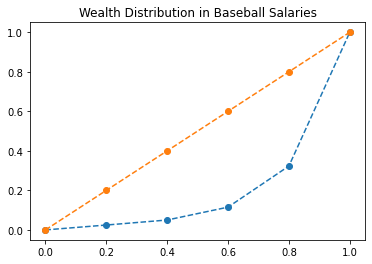

In [31]:
plt.plot(x, points, '--o')
plt.plot(x, x, '--o');
plt.title('Wealth Distribution in Baseball Salaries');

## Fitting the polynomial

As we discussed in class, we would like a description of a function through the given points.  This way, we can use our definite integral to find the area.  We use `numpy` to determine this polynomial, and play around with the complexity until we get a good fit.

In [32]:
coefs = np.polyfit(x, points, 4)

In [33]:
coefs

array([ 3.73412249e+00, -4.40141273e+00,  1.76900998e+00, -1.02976053e-01,
        6.28153587e-04])

In [34]:
#shortcut to evaluate the polynomial
np.polyval(coefs, x)

array([6.28153587e-04, 2.15566362e-02, 5.63824502e-02, 1.08923240e-01,
       3.26386955e-01, 9.99371846e-01])

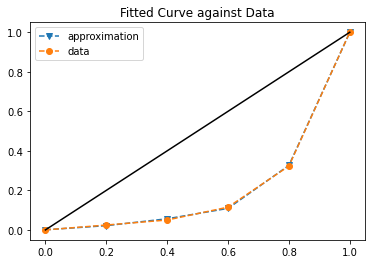

In [35]:
#plotting
plt.plot(x, np.polyval(coefs, x), '--v', label = 'approximation')
plt.plot(x, points, '--o', label = 'data')
plt.plot(x, x, color = 'black')
plt.legend();
plt.title('Fitted Curve against Data');

In [36]:
np.round(coefs, decimals = 3)

array([ 3.734e+00, -4.401e+00,  1.769e+00, -1.030e-01,  1.000e-03])

We will use a simpler version of the polynomial and check that it is a reasonable approximation:

$$f(x) = 3.73x^4 - 4.4x^3 + 1.769x^2 - .103x$$

In [37]:
def L(x):
    return 3.73*x**4 - 4.4*x**3 + 1.769*x**2 - .103*x 

In [38]:
def E(x): return x

In [39]:
x = np.array(x)

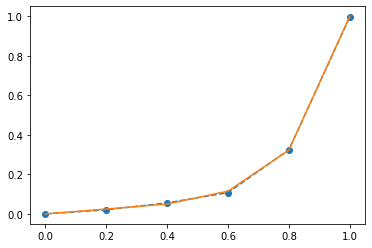

In [40]:
plt.plot(x, L(x), '--o')
plt.plot(x, points);

## Gini Index

We have a line of inequality $y = x$ and the Lorenz curve $f(x)$.  The Gini Index is given by:

$$G = 2\int_0^1 x - f(x) ~ dx$$

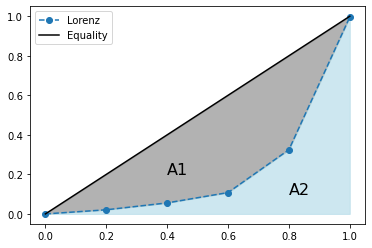

In [41]:
plt.plot(x, L(x), '--o', label = 'Lorenz')
plt.plot(x, E(x), color = 'black', label = 'Equality');
plt.fill_between(x, L(x), E(x), color = 'gray', alpha = 0.6)
plt.fill_between(x, L(x), color = 'lightblue', alpha = 0.6)
plt.text(0.4, 0.2, 'A1', size = 16)
plt.text(0.8, 0.1, 'A2', size = 16)
plt.legend();

## Evaluating the Integral

In [42]:
from scipy.integrate import quad

In [43]:
def a1(x):
    return E(x) - L(x)

In [44]:
quad(a1, 0, 1)[0]

0.3158333333333334

In [45]:
2*quad(a1, 0, 1)[0]

0.6316666666666668

### Example 2: NYC Salary Data

The data below comes from [NYC Open Data](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e). 

-----

*Data is collected because of public interest in how the City’s budget is being spent on salary and overtime pay for all municipal employees. Data is input into the City's Personnel Management System (“PMS”) by the respective user Agencies. Each record represents the following statistics for every city employee: Agency, Last Name, First Name, Middle Initial, Agency Start Date, Work Location Borough, Job Title Description, Leave Status as of the close of the FY (June 30th), Base Salary, Pay Basis, Regular Hours Paid, Regular Gross Paid, Overtime Hours worked, Total Overtime Paid, and Total Other Compensation (i.e. lump sum and/or retro payments). This data can be used to analyze how the City's financial resources are allocated and how much of the City's budget is being devoted to overtime. The reader of this data should be aware that increments of salary increases received over the course of any one fiscal year will not be reflected. All that is captured, is the employee's final base and gross salary at the end of the fiscal year*

-----

In [46]:
#!pip install sodapy

In [47]:
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us", None)

results = client.get("k397-673e", limit=10000)


last_year_salaries = pd.DataFrame.from_records(results)

In [48]:
last_year_salaries['fiscal_year'].describe()

count     10000
unique        2
top        2020
freq       8634
Name: fiscal_year, dtype: object

In [49]:
last_year_salaries[last_year_salaries['fiscal_year'] == '2020'].shape

(8634, 17)

In [50]:
last_year_salaries = last_year_salaries[last_year_salaries['fiscal_year'] == '2020']

In [51]:
last_year_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8634 entries, 0 to 8633
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fiscal_year                 8634 non-null   object
 1   payroll_number              8634 non-null   object
 2   agency_name                 8634 non-null   object
 3   last_name                   8634 non-null   object
 4   first_name                  8634 non-null   object
 5   agency_start_date           8634 non-null   object
 6   work_location_borough       8634 non-null   object
 7   title_description           8634 non-null   object
 8   leave_status_as_of_july_31  8634 non-null   object
 9   base_salary                 8634 non-null   object
 10  pay_basis                   8634 non-null   object
 11  regular_hours               8634 non-null   object
 12  regular_gross_paid          8634 non-null   object
 13  ot_hours                    8634 non-null   obje

In [52]:
last_year_salaries.head(2)

,fiscal_year,payroll_number,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,mid_init
0,2020,67,ADMIN FOR CHILDREN'S SVCS,MAKHRINSKY,IRINA,2011-10-03T00:00:00.000,MANHATTAN,STAFF ANALYST,ACTIVE,81509.00,per Annum,1820.00,79329.44,0.00,0.00,0.00,NaN
1,2020,67,ADMIN FOR CHILDREN'S SVCS,ACEVEDO,MIGUELINA,2006-02-27T00:00:00.000,BRONX,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ACTIVE,86096.00,per Annum,1820.00,89599.83,142.25,9830.52,4501.92,P


In [53]:
last_year_salaries['base_salary'] = last_year_salaries['base_salary'].astype('float')

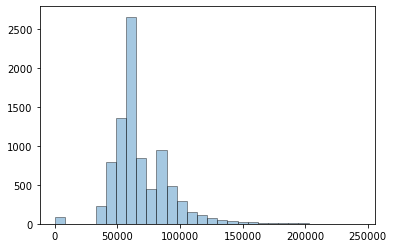

In [54]:
plt.hist(last_year_salaries['base_salary'], bins = 30, alpha = 0.4, edgecolor = 'black');